# Homework 3
### By: Zack Bilderback

### Question 1

Approach: I first import the necessary modules. I then use the read function to read in the two files. Both of the files separate data by tabs so I have to use the \t delimiter when reading in the data. I then use set the columns of each dataframe to the specified names. 

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import math
%pylab inline

goldDF = pd.read_csv('gold.txt', sep = "\t", header = None, dtype = unicode)
goldDF.columns = ["url", "category"]
labelsDF = pd.read_csv('labels.txt', sep = "\t", header = None, dtype = unicode)
labelsDF.columns = ["turk", "url", "category"]
print "Top 5 from gold dataframe:"
print goldDF[:5]
print 
print "Top 5 from labels dataframe"
print labelsDF[:5]

Populating the interactive namespace from numpy and matplotlib
Top 5 from gold dataframe:
                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X

Top 5 from labels dataframe
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


### Question 2

Approach: I first merge the two dataframes together so the indexes are the same which make applying a mask easier. I then make two masks on the category_y column to determine if the url is present. If the value in the category_y column is Nan then that url was not present in the gold dataframe. The same logic can be applied to that column if the value is present. I use those two masks to split the labels dataframe into the specified values. The column category_x are the ratings from the labels dataframe and category_y represents the ratings from the gold dataframe. 

In [2]:
merged = pd.merge(labelsDF, goldDF, on = "url", how = "left")
notNullUrls = merged['category_y'].notnull()
nullUrls = merged['category_y'].isnull()
labels_on_gold = merged[notNullUrls]
labels_unknown = merged[nullUrls]
print "First 5 from labels_on_gold:"
print labels_on_gold[:5]
print 
print "First 5 from labels_unknown"
print labels_unknown[:5]

First 5 from labels_on_gold:
               turk                        url category_x category_y
245  A1253FXHCZ9CWM  http://0800-horoscope.com          G          G
246  A153PKAL7OAY36  http://0800-horoscope.com          G          G
247  A1FV9SAPL5C6KY  http://0800-horoscope.com          G          G
248  A1JTOT0DWM6QGL  http://0800-horoscope.com          G          G
249  A1PXXEOGQ76RNJ  http://0800-horoscope.com          G          G

First 5 from labels_unknown
             turk            url category_x category_y
0  A1OT3A29R9N1DG  http://000.cc          P        NaN
1  A1PXXEOGQ76RNJ  http://000.cc          G        NaN
2  A1PXXEOGQ76RNJ  http://000.cc          G        NaN
3  A21US576U8SCO4  http://000.cc          G        NaN
4  A2LGX47NN7C5D3  http://000.cc          G        NaN


### Question 3

Approach: I first create a table by calling crosstab on the turk and category_y(gold rating) columns from the labels_on_gold dataframe. I am then able to sum by turk or the index which gives me the total number of ratings for each turk. I then create the new dataframe called rater_goodness with the number of ratings per turk as the column and the index as turk. I then change the column name for the problem to be "Num of Ratings". I think make a mask using the labels_on_gold dataframe to check if the ratings are correct for each url. I do a value count on the turk column to count how many times each turk provided the correct rating. This tells me how many times a turk was correct. I then drop duplicate indicies from my rater_goodness dataframe to avoid mulitple row division errors. I then sort the new dataframe by index to align it properly for the average correctness division performed with the two newly created series. 

In [3]:
table = pd.crosstab(labels_on_gold['turk'], labels_on_gold['category_y'])
turkTotals = table.sum(axis = 1)
rater_goodness = DataFrame(data = turkTotals, index = labels_on_gold['turk'])
rater_goodness.columns = ["Num of Ratings"]
correctMask = merged['category_x'] == merged['category_y']
correctRatings = merged[correctMask]
counts = correctRatings['turk'].value_counts()
rater_goodness = rater_goodness.reset_index().drop_duplicates(subset='turk', keep='last').set_index('turk')
rater_goodness = rater_goodness.sort_index()
rater_goodness['Avg Correctness'] = counts / rater_goodness["Num of Ratings"]
print "First 5 from rater_goodness dataframe:"
rater_goodness[:5]

First 5 from rater_goodness dataframe:


,Num of Ratings,Avg Correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333


### Question 4

Approach: I take the average correctness column and store the series as the variable p. I then create a new column called 'odds' which is the formula p / (1.001-p) and print the first 5 rows. I use 1.001 to get rid of infinite values. 

In [4]:
p = rater_goodness['Avg Correctness']
rater_goodness['odds'] = p / (1.001 - p)
print "First 5 rows:"
rater_goodness[:5]

First 5 rows:


,Num of Ratings,Avg Correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251


### Question 5

Approach: I create a mask using the 'Num of Ratings' column and check if the value is greater than or equal to 20. I then apply the mask and sort the dataframe by the values in the average correctness column. I then print the top 10. 

In [5]:
atLeast20mask = (rater_goodness['Num of Ratings'] >= 20)
topTurks = rater_goodness[atLeast20mask]
topTurks = topTurks.sort_values(by = 'Avg Correctness', ascending = False)
print "The top 10 most accurate turks:"
topTurks[:10]

The top 10 most accurate turks:


,Num of Ratings,Avg Correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


### Quesiton 6

Approach: There seems to be evidence suggesting that even turks who rate lots of urls are not anymore accurate than turks who rate few urls. Most turks rate less than 60 urls and their accuracies are equal or better to the turks who rate more urls than that. I used to plot function to look at the relationship between number of ratings and average correctness of each turk. 

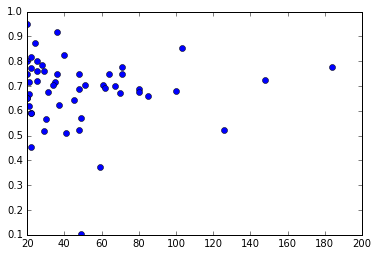

In [6]:
plot(topTurks['Num of Ratings'], topTurks['Avg Correctness'], marker='o', linestyle='')

### Question 7

Approach: I first sort the rater_goodness dataframe by the number of ratings in ascending order. This allows me to divide the total length into 4 distinct quarters and I take the top quarter because that is the 75th percentile. I then merge the labels_unknown and newly sorted dataframe by the turk column and drop duplicates. I delete the newly created index column so the turks are the index. I did part (b) first and printed the first 5 results of the 75th percentile. 

In [7]:
sortedTurks = rater_goodness.sort_values('Num of Ratings', ascending = False)[:len(rater_goodness)/4]
mergedTurks = pd.merge(labels_unknown, sortedTurks, left_on = 'turk', right_index = True).drop_duplicates().reset_index()
del mergedTurks['index']
print "First 5 results of 75th percentile:"
mergedTurks[:5]

First 5 results of 75th percentile:


,turk,url,category_x,category_y,Num of Ratings,Avg Correctness,odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,NaN,41,0.512195,1.047852
1,A1PXXEOGQ76RNJ,http://0000.jp,G,NaN,41,0.512195,1.047852
2,A1PXXEOGQ76RNJ,http://000relationships.com,G,NaN,41,0.512195,1.047852
3,A1PXXEOGQ76RNJ,http://007swz.cn,G,NaN,41,0.512195,1.047852
4,A1PXXEOGQ76RNJ,http://01768.com,G,NaN,41,0.512195,1.047852


Part (a): To calculate the product of odds, I groupby the url and category_x columns from the dataframe in part b. Then call the prod function to multiply the odds together and rename the new column 'Overall Odds'.

In [8]:
overallOdds = mergedTurks.groupby(['url', 'category_x'])[['odds']].prod()
overallOdds.columns = ['Overall Odds']
print "First 5 results of Overall Odds:"
overallOdds[:5]

First 5 results of Overall Odds:


Overall Odds
url                         category_x              
http://0-101.net            G               2.155963
http://000.cc               G               1.393883
http://0000.jp              G              14.488244
http://000relationships.com G               3.881884
                            P               1.851852

### Question 8

Approach: I first undstack the category_x column so each row is an url and category rating and overall odds for that rating so there can be multiple rows with the same url. I then fill the na values in the overall odds column with 0 and then tranpose it so I can call idxmax and get the topCategories for each url. I then use the max function on the overall odds column and specify the axis to be 1 so it uses the column and not rows. I store this result in topOdds which is the top odds for each url. I then clean up the dataframe and print the first 5 rows. 

In [9]:
result_75 = overallOdds.unstack('category_x')
topCategories = result_75['Overall Odds'].fillna(0).T.idxmax()
result_75['top category'] = topCategories
topOdds = result_75['Overall Odds'].max(axis = 1)
result_75['top odds'] = topOdds
del result_75['Overall Odds']
print "First 5 rows of result_75:"
result_75[:5]

First 5 rows of result_75:


,top category,top odds
category_x,,
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.393883
http://0000.jp,G,14.488244
http://000relationships.com,G,3.881884
http://000vitamins.com,G,3.784982


### Question 9

Approach: I just copy the code from question 7 but when I divide the length of rater_goodness by 4, I then multiply by 3 to get the top 75% or 25th percentile. The rest of the code is similiar to question 7. 

In [10]:
sortedTurks = rater_goodness.sort_values('Num of Ratings', ascending = False)[:3*(len(rater_goodness)/4)]
mergedTurks = pd.merge(labels_unknown, sortedTurks, left_on = 'turk', right_index = True).drop_duplicates().reset_index()
del mergedTurks['index']
print "First 5 results of 25 percentile:"
mergedTurks[:5]

First 5 results of 25 percentile:


,turk,url,category_x,category_y,Num of Ratings,Avg Correctness,odds
0,A1OT3A29R9N1DG,http://000.cc,P,NaN,8,0.5,0.998004
1,A1OT3A29R9N1DG,http://1centemails.com,G,NaN,8,0.5,0.998004
2,A1OT3A29R9N1DG,http://24hfx.com,P,NaN,8,0.5,0.998004
3,A1OT3A29R9N1DG,http://265e.com,P,NaN,8,0.5,0.998004
4,A1OT3A29R9N1DG,http://30gh.com,G,NaN,8,0.5,0.998004


In [11]:
overallOdds = mergedTurks.groupby(['url', 'category_x'])[['odds']].prod()
overallOdds.columns = ['Overall Odds']
print "First 5 results of Overall Odds:"
overallOdds[:5]

First 5 results of Overall Odds:


Overall Odds
url                         category_x              
http://0-101.net            G           2.155963e+00
http://000.cc               G           2.081448e+03
                            P           9.980040e-01
http://0000.jp              G           2.877556e+07
http://000relationships.com G           1.871855e+07

Approach: This piece of code is the same as question 8 but i rename the dataframe to be result_25. 

In [12]:
result_25 = overallOdds.unstack('category_x')
topCategories = result_25['Overall Odds'].fillna(0).T.idxmax()
result_25['top category'] = topCategories
topOdds = result_25['Overall Odds'].max(axis = 1)
result_25['top odds'] = topOdds
del result_25['Overall Odds']
print "First 5 rows of result_25:"
result_25[:5]

First 5 rows of result_25:


,top category,top odds
category_x,,
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.081448e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,G,1.871855e+07
http://000vitamins.com,G,5.014149e+00


Approach:

In [13]:
resultsDF = pd.merge(result_75, result_25, left_index = True, right_index = True)
del resultsDF['top odds_x']
del resultsDF['top odds_y']
resultsDF.columns = ['result_75 prediction', 'result_25 prediction']
table = pd.crosstab(resultsDF['result_75 prediction'], resultsDF['result_25 prediction'])
print "Table showing predictions:"
table

Table showing predictions:


result_25 prediction,G,P,R,X
result_75 prediction,,,,
G,8216,620,175,258
P,190,345,48,21
R,23,37,127,26
X,19,6,29,470


The most errors occur on row category=G and the column category=P which has a value of 620. 